In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv("car data.csv")

# View top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [7]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
17    ertiga  2016           7.75          10.79       43000    Diesel   
93  fortuner  2015          23.00          30.61       40000    Diesel   

   Selling_type Transmission  Owner  
17       Dealer       Manual      0  
93       Dealer    Automatic      0  


In [8]:
df = df.drop_duplicates()

In [9]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.describe(include= 'all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,299,299.000000,299.000000,299.000000,299.000000,299,299,299,299.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,193,260,NaN
mean,NaN,2013.615385,4.589632,7.541037,36916.752508,NaN,NaN,NaN,0.043478
std,NaN,2.896868,4.984240,8.566332,39015.170352,NaN,NaN,NaN,0.248720
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.510000,6.100000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.840000,48883.500000,NaN,NaN,NaN,0.000000


In [13]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [14]:
df['Current Year'] = 2025

# Calculating the age of the vehicles 
df['Age'] = df['Current Year'] - df['Year']

In [15]:
df.drop(['Current Year'], axis=1, inplace=True)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


## Top 10 Most Selling Cars

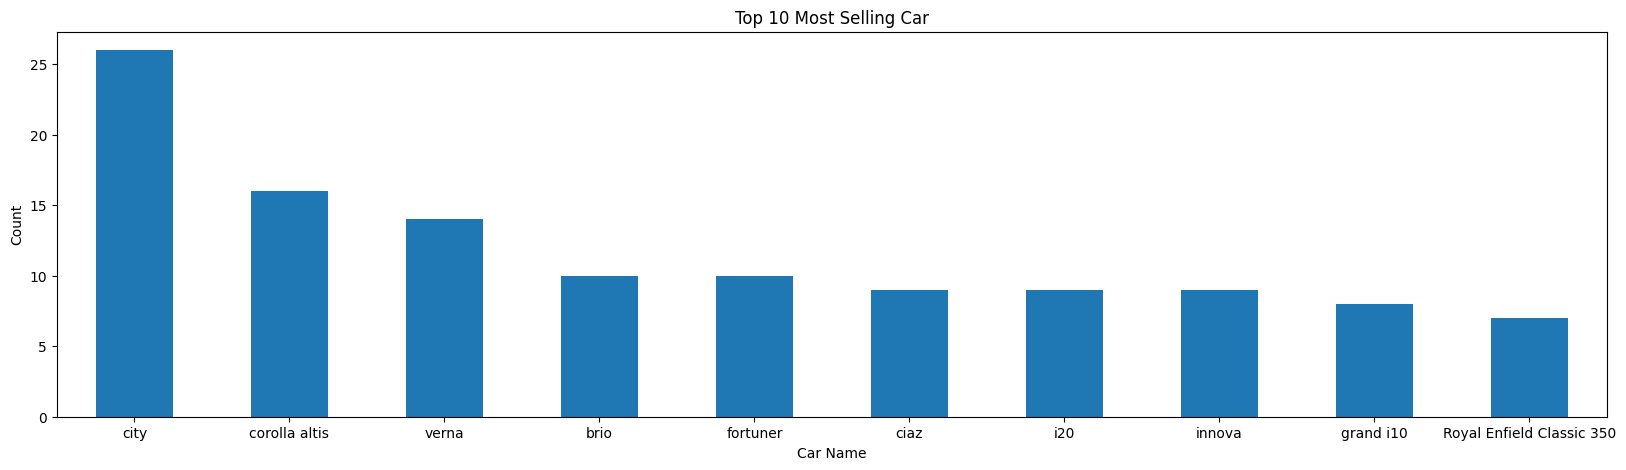

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

top10 = df['Car_Name'].value_counts()[:10]

plt.figure(figsize=(20, 5))
top10.plot(kind='bar')

plt.xticks(rotation=0)


plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

plt.show()

## Number of Cars Bought Each Year

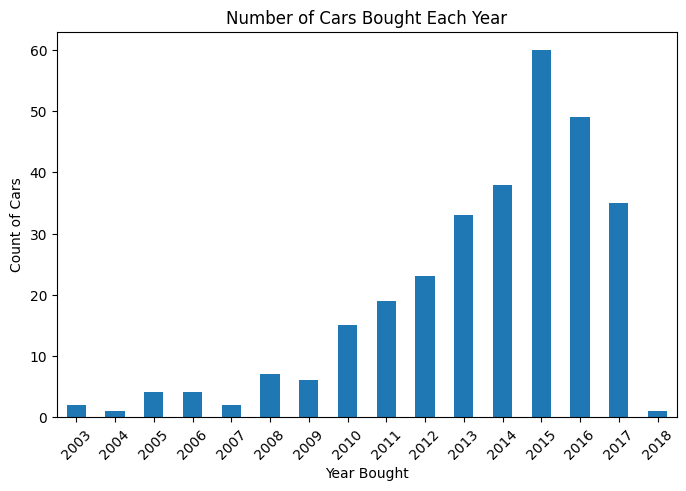

In [18]:
plt.figure(figsize=(8, 5))

yearly_counts = df.groupby('Year').count()['Car_Name']

yearly_counts.plot(kind='bar')

plt.xticks(rotation=45)

plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

plt.show()

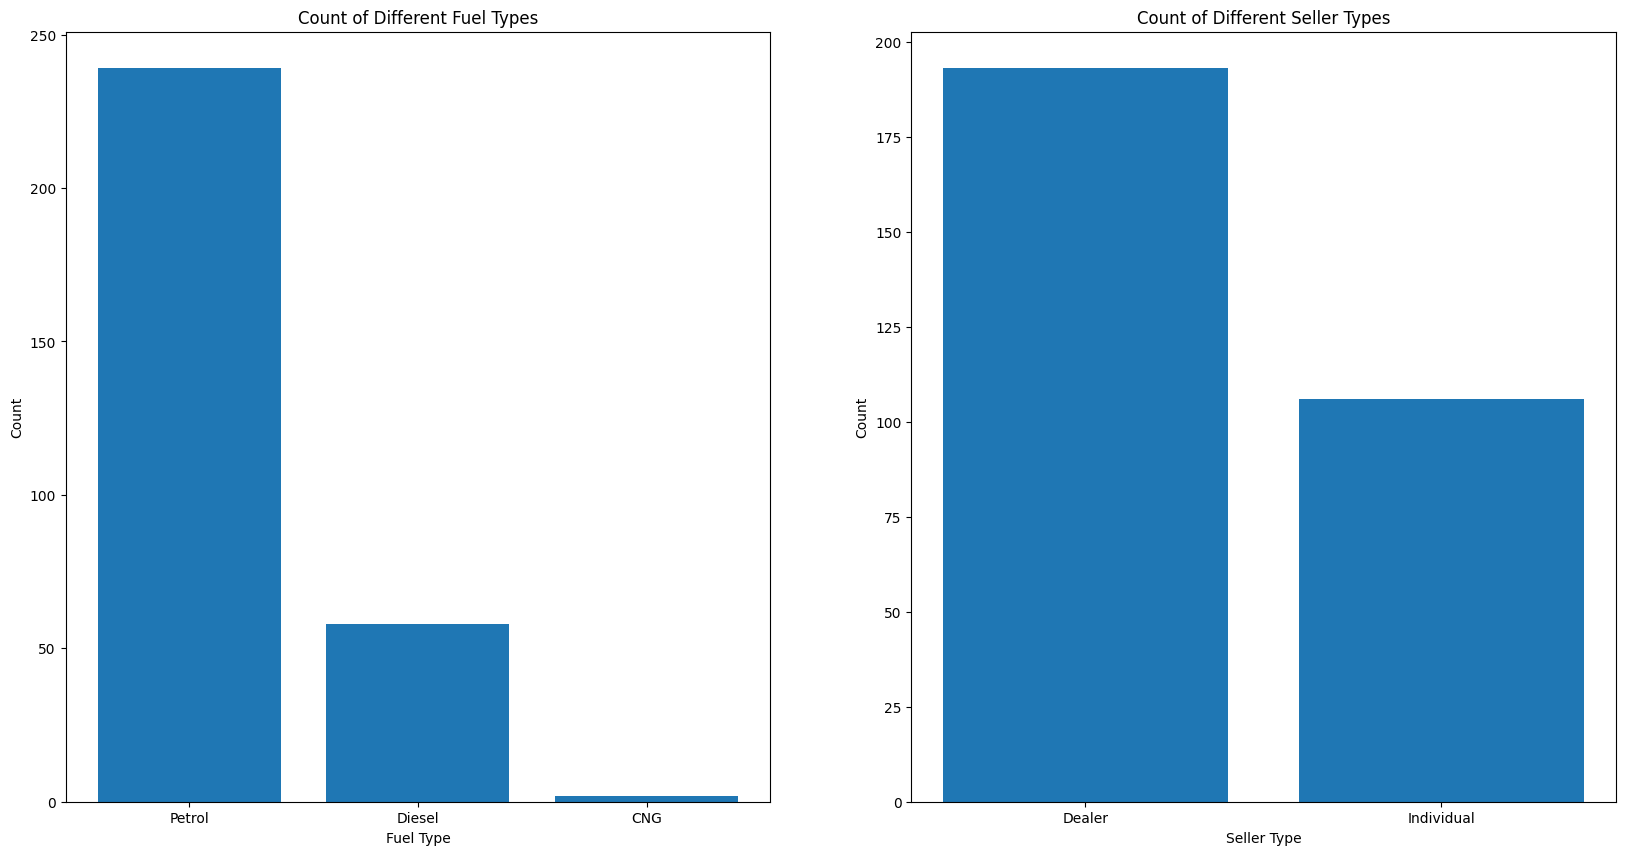

In [19]:
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(1, 2, 1)  
fuel_counts = df['Fuel_Type'].value_counts() 
plt.bar(fuel_counts.index, fuel_counts.values)  
plt.title("Count of Different Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Count")


# Subplot 2: Count of different Seller Types
plt.subplot(1, 2, 2)  
selling_type_counts = df['Selling_type'].value_counts() 
plt.bar(selling_type_counts.index, selling_type_counts.values)  
plt.title("Count of Different Seller Types")
plt.xlabel("Seller Type")
plt.ylabel("Count")

plt.show()

## Handling Outliers

<Axes: xlabel='Selling_Price'>

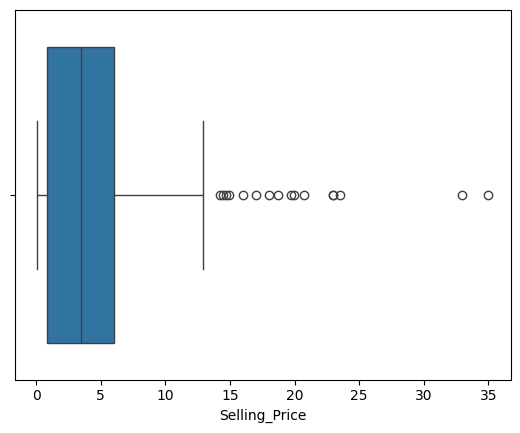

In [18]:
import seaborn as sns

sns.boxplot(data=df, x='Selling_Price')


In [19]:
sorted(df['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.51

In [20]:
df = df[-(df['Selling_Price']>=33.0) & (df['Selling_Price']<=35.0)]

In [21]:
df.shape

(297, 10)

## Encoding the Categorical Columns

In [22]:
df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11


In [23]:
df = pd.get_dummies(df) # One hot encoding- creates binary column for each category
df = df.astype(int)

In [24]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3,5,27000,0,11,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4,9,43000,0,12,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7,9,6900,0,8,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2,4,5200,0,14,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4,6,42450,0,11,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [25]:
# Drop all columns that start with 'Car_Name'
df = df.loc[:, ~df.columns.str.startswith('Car_Name')]
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3,5,27000,0,11,0,0,1,1,0,0,1
1,2013,4,9,43000,0,12,0,1,0,1,0,0,1
2,2017,7,9,6900,0,8,0,0,1,1,0,0,1
3,2011,2,4,5200,0,14,0,0,1,1,0,0,1
4,2014,4,6,42450,0,11,0,1,0,1,0,0,1


## Store Feature Matrix in X and Target in y

In [26]:
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

In [27]:
print(X.isnull().sum())


Year                       0
Present_Price              0
Driven_kms                 0
Owner                      0
Age                        0
Fuel_Type_CNG              0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Dealer        0
Selling_type_Individual    0
Transmission_Automatic     0
Transmission_Manual        0
dtype: int64


In [28]:
print(y.isnull().sum())


0


## Split the data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Import the Model (Linear Regression)

In [30]:
from sklearn.linear_model import LinearRegression

## Model Training

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on the test set

In [32]:
y_pred = model.predict(X_test)

## Evaluating the algorithm

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 1.1238048998734138
Mean Squared Error (MSE): 2.5936988756984687
Root Mean Squared Error (RMSE): 1.6104964687010241
R-squared (R²): 0.8406190379532257


## Actual vs Predicted Prices

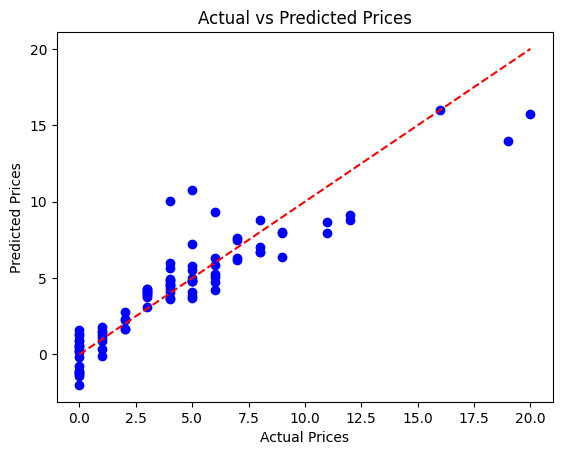

In [34]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [36]:
import pickle
# Save the model to a .sav file
with open('car_price_predictor_model.sav', 'wb') as file:
    pickle.dump(model, file)
print("Model was saved successfully!")

Model was saved successfully!


In [37]:
# Load the saved model from the .sav file
with open('car_price_predictor_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model was loaded successfully!")

Model was loaded successfully!
